In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/My Drive/Traffic Signs'
stop_sign_dir = os.path.join(data_dir, 'stop')
not_stop_sign_dir = os.path.join(data_dir, 'non stop')

In [ ]:
print("Classes:", os.listdir(data_dir))
print("Stop Signs images:", len(os.listdir(os.path.join(data_dir, 'stop'))))
print("Not Stop Signs images:", len(os.listdir(os.path.join(data_dir, 'non stop'))))

Classes: ['stop', 'non stop']
Stop Signs images: 97
Not Stop Signs images: 100


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 693ms/step - accuracy: 0.8581 - loss: 0.3715 - val_accuracy: 0.7949 - val_loss: 0.4413
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.8942 - loss: 0.2949 - val_accuracy: 0.8462 - val_loss: 0.4277
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.9099 - loss: 0.2820 - val_accuracy: 0.8718 - val_loss: 0.4053
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 450ms/step - accuracy: 0.9458 - loss: 0.2269 - val_accuracy: 0.9231 - val_loss: 0.3788
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.9080 - loss: 0.1861 - val_accuracy: 0.8974 - val_loss: 0.3741
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step - accuracy: 0.9763 - loss: 0.1267 - val_accuracy: 0.8974 - val_loss: 0.4042
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 0.9730 - loss: 0.0949 - val_accuracy: 0.8974 - val_loss: 0.4829
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.9643 - loss: 0.0765 - val_accuracy: 0.7949 - val_los

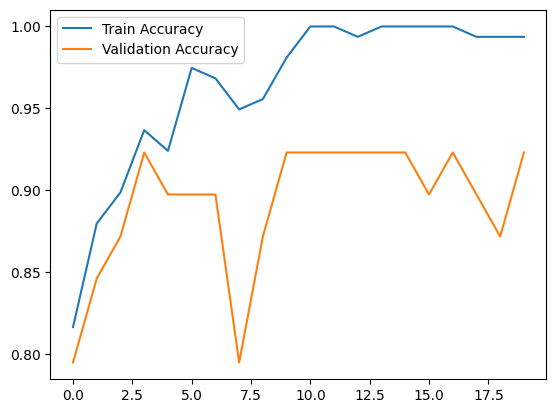

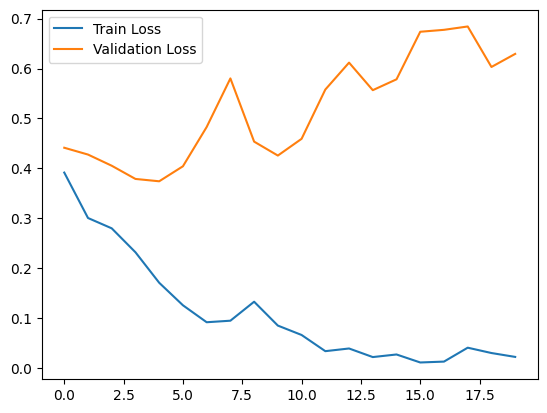

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


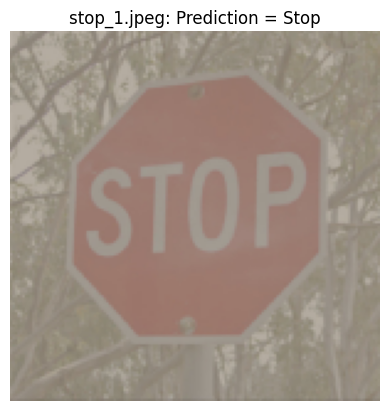

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


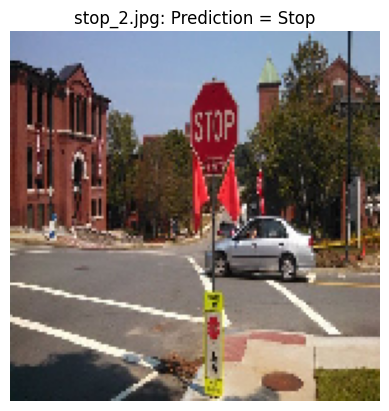

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


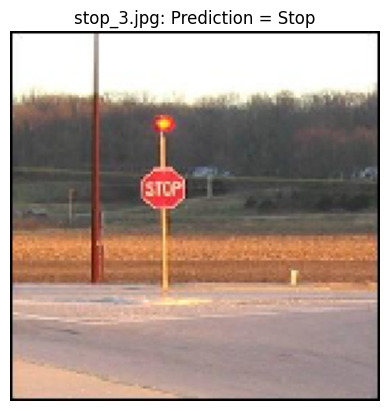

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


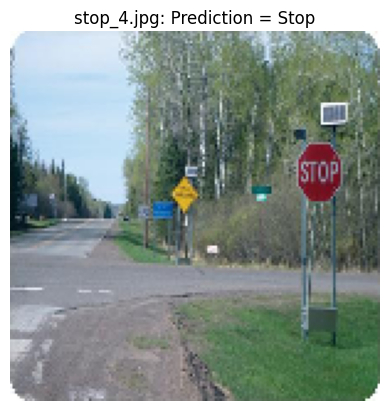

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


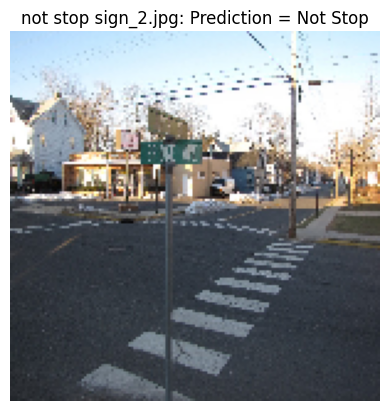

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


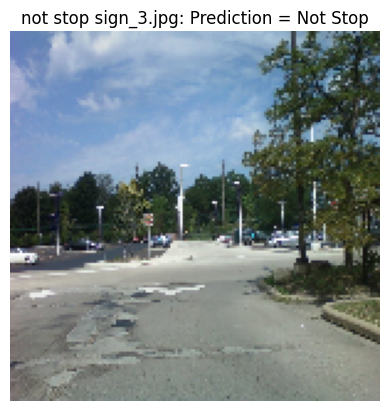

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


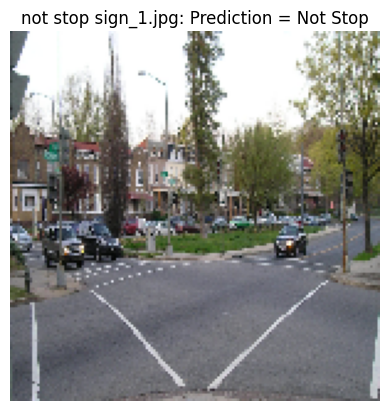

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


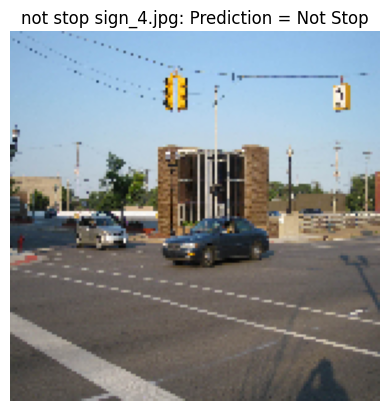

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


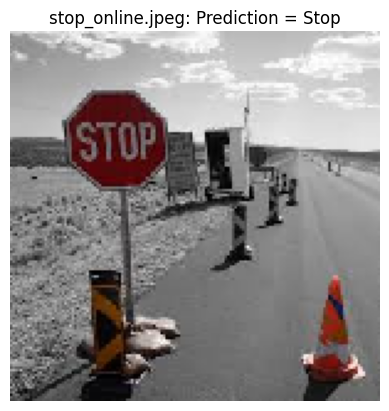

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


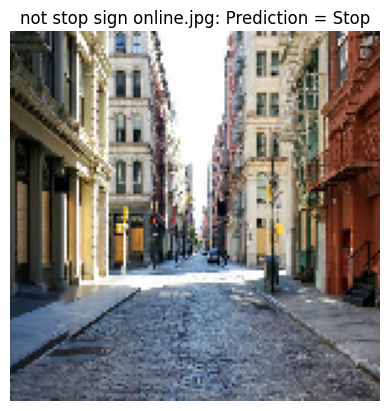

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


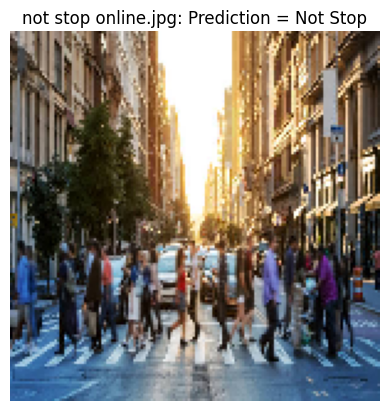

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_folder = '/content/drive/My Drive/Traffic Signs/test data'

def display_predictions(model, folder_path):
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        label = "Not Stop" if prediction[0][0] < 0.5 else "Stop"
        plt.imshow(img)
        plt.title(f"{img_file}: Prediction = {label}")
        plt.axis('off')
        plt.show()

display_predictions(model, test_folder)